In [75]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,GlobalAveragePooling2D,Flatten
from keras import layers,models
from keras.models import Sequential,Model
from keras.applications.inception_v3 import InceptionV3
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [32]:
train_path = "hotdog-nothotdog/hotdog-nothotdog/train"
test_path = "hotdog-nothotdog/hotdog-nothotdog/test"

In [66]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.09)
test_datagen = ImageDataGenerator(rescale=1./255)

In [67]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(300,300), batch_size=32, class_mode='binary',subset='training')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(300,300), batch_size=32, class_mode='binary')
val_generator = train_datagen.flow_from_directory(train_path, target_size=(300,300), batch_size=32, class_mode='binary', subset='validation')

Found 3862 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [68]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

In [69]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [70]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

In [71]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam',
               metrics = ['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
121/121 [==============================] - 145s 1s/step - loss: 0.2357 - accuracy: 0.9112 - val_loss: 0.1359 - val_accuracy: 0.9421
Epoch 2/5
121/121 [==============================] - 140s 1s/step - loss: 0.1669 - accuracy: 0.9355 - val_loss: 0.1070 - val_accuracy: 0.9658
Epoch 3/5
121/121 [==============================] - 141s 1s/step - loss: 0.1440 - accuracy: 0.9436 - val_loss: 0.1242 - val_accuracy: 0.9553
Epoch 4/5
121/121 [==============================] - 139s 1s/step - loss: 0.1562 - accuracy: 0.9384 - val_loss: 0.1530 - val_accuracy: 0.9447
Epoch 5/5
121/121 [==============================] - 140s 1s/step - loss: 0.1258 - accuracy: 0.9505 - val_loss: 0.0970 - val_accuracy: 0.9632


In [72]:
model.save('hotdog.h5')

In [73]:
loss, accuracy = model.evaluate(test_generator)

13/13 [==============================] - 12s 892ms/step - loss: 0.1315 - accuracy: 0.9650


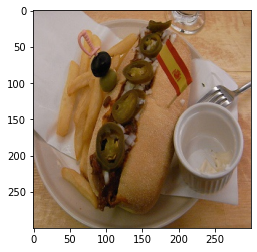

In [231]:
img_path = 'hotdog-nothotdog/hotdog-nothotdog/test/hotdog/1725.jpg'
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(img)
x = image.img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)


In [232]:
prediction = model.predict(x)
print("HotDog" if prediction < 0.5 else "Not Hot Dog" )
# print("The probability is {}%".format(float(1-prediction[0]*100 if prediction<0.5 else prediction[0]*100)))

1/1 [==============================] - 0s 61ms/step
HotDog
